Imports and Initializations

In [1]:
!cd
!C:\EnergyPlusV9-6-0\EnergyPlus -v
!C:\EnergyPlusV9-6-0\EnergyPlus -h
import os
import opyplus as op
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import pandas as pd
eplus_dir_path = op.get_eplus_base_dir_path((9, 6, 0))
# print("Baseline Filepath:")
# filepath1 = input()
# print("Optimized Filepath:")
# filepath2 = input()
idf_path = "C:\\Users\\chmat\\Documents\\GenOpt\\30719\\backup\\bldg30719.idf"
idf_path2 = "C:\\Users\\chmat\\Documents\\GenOpt\\30719\\output\\output.idf"
idf_patho1 = "C:\\Users\\chmat\\Documents\\GenOpt\\30719\\output\\output1.idf"
idf_patho2 = "C:\\Users\\chmat\\Documents\\GenOpt\\30719\\output\\output2.idf"
idf_patho3 = "C:\\Users\\chmat\\Documents\\GenOpt\\30719\\output\\output3.idf"
idf_patho4 = "C:\\Users\\chmat\\Documents\\GenOpt\\30719\\output\\output4.idf"
idf_patho5 = "C:\\Users\\chmat\\Documents\\GenOpt\\30719\\output\\output5.idf"
#idf_path3 = "C:\\Users\\chmat\\Documents\\GenOpt\\2068\\test\\test.expidf"
epw_path = os.path.join("-w",
    eplus_dir_path,
    "WeatherData",
    "USA_CO_Denver-Aurora-Buckley.AFB.724695_TMY3.epw")

PricePerKwh = pd.read_excel (r'C:\\Users\\chmat\\Desktop\\THESIS\\Optimization Files\\TimeofDayPricing.xlsx')

C:\Users\chmat\Desktop\THESIS
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.21 22:23
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.21 22:23
PythonLinkage: Linked to Python Version: "3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]"
Built on Platform: Windows_x86_64
Usage: energyplus [options] [input-file]
Options:
  -a, --annual                 Force annual simulation
  -c, --convert                Output IDF->epJSON or epJSON->IDF, dependent on
                               input file type
  -d, --output-directory ARG   Output directory path (default: current
                               directory)
  -D, --design-day             Force design-day-only simulation
  -h, --help                   Display help information
  -i, --idd ARG                Input data dictionary path (default: Energy+.idd
                               in executable directory)
  -j, --jobs ARG               Multi-thread with N threads; 1 thread with no
                   

BASELINE

In [2]:
# # # run simulation
# s = op.simulate(idf_path, epw_path, "Baseline")
# print(f"status: {s.get_status()}\n")
# print(f"Eplus .err file:\n{s.get_out_err().get_content()}")
# # eso = s.get_out_eso()
# # print(eso.get_info())

OPTIMIZED

In [3]:
# # # run simulation
# s2 = op.simulate(idf_path2, epw_path, "Optimized")
# print(f"status: {s2.get_status()}\n")
# print(f"Eplus .err file:\n{s2.get_out_err().get_content()}")

TEST

In [4]:
# # # run simulation
# s3 = op.simulate(idf_path3, epw_path, "Test")
# print(f"status: {s3.get_status()}\n")
# print(f"Eplus .err file:\n{s3.get_out_err().get_content()}")

PULL DATA

In [5]:
df = pd.read_csv(idf_path[0:-3]+'csv')
df2 = pd.read_csv(idf_path2[0:-3]+'csv')
dfo1 = pd.read_csv(idf_patho1[0:-3]+'csv')
dfo2= pd.read_csv(idf_patho2[0:-3]+'csv')
dfo3 = pd.read_csv(idf_patho3[0:-3]+'csv')
dfo4 = pd.read_csv(idf_patho4[0:-3]+'csv')
dfo5 = pd.read_csv(idf_patho5[0:-3]+'csv')
#df3 = pd.read_csv('C:\\Users\\chmat\\Documents\\GenOpt\\1\\test\\REFBLDG1.csv')

In [6]:
df2

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),GARAGE ZONE:Zone Mean Air Temperature [C](Hourly),LIVING ZONE:Zone Mean Air Temperature [C](Hourly),RES DS RES AC ASYS RET AIR ZONE:Zone Mean Air Temperature [C](Hourly),RES DS RES FUR ELECTRIC ASYS RET AIR ZONE:Zone Mean Air Temperature [C](Hourly),UNFINISHED ATTIC ZONE:Zone Mean Air Temperature [C](Hourly),GARAGE ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),RES DS RES AC ASYS RET AIR ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),RES DS RES FUR ELECTRIC ASYS RET AIR ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),UNFINISHED ATTIC ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),Heating:Electricity [J](Hourly)
0,01/01 01:00:00,-4.500,15.636801,18.996051,23.0,17.320964,-1.881633,0.0,19.0,0.0,0.0,0.0,2.887786e+07
1,01/01 02:00:00,-3.000,15.522668,18.502021,23.0,17.207491,-1.194641,0.0,18.5,0.0,0.0,0.0,2.425167e+07
2,01/01 03:00:00,-3.625,15.207785,18.500000,23.0,17.136165,-1.123067,0.0,18.5,0.0,0.0,0.0,2.463605e+07
3,01/01 04:00:00,-2.750,15.016057,18.500000,23.0,17.125959,-0.765780,0.0,18.5,0.0,0.0,0.0,2.468586e+07
4,01/01 05:00:00,-2.000,14.841199,18.500000,23.0,17.154359,-0.267050,0.0,18.5,0.0,0.0,0.0,2.445756e+07
5,01/01 06:00:00,-1.375,14.719447,18.500000,23.0,17.167574,0.488095,0.0,18.5,0.0,0.0,0.0,2.267889e+07
6,01/01 07:00:00,-1.000,14.619032,18.001473,23.0,16.921339,0.547041,0.0,18.0,0.0,0.0,0.0,1.702155e+07
7,01/01 08:00:00,-1.000,14.490784,18.497582,23.0,17.086368,0.797377,0.0,18.5,0.0,0.0,0.0,2.110432e+07
8,01/01 09:00:00,-0.375,14.415302,18.500008,23.0,17.199054,2.546535,0.0,18.5,0.0,0.0,0.0,1.727357e+07
9,01/01 10:00:00,1.250,14.470017,18.500007,23.0,17.340515,4.395298,0.0,18.5,0.0,0.0,0.0,1.541062e+07


In [7]:
# df = df[48:72]
# df2 = df2[48:72]
# #df3 = df3[48:72]

In [8]:
df2.keys()

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)',
       'GARAGE ZONE:Zone Mean Air Temperature [C](Hourly)',
       'LIVING ZONE:Zone Mean Air Temperature [C](Hourly)',
       'RES DS RES AC ASYS RET AIR ZONE:Zone Mean Air Temperature [C](Hourly)',
       'RES DS RES FUR ELECTRIC ASYS RET AIR ZONE:Zone Mean Air Temperature [C](Hourly)',
       'UNFINISHED ATTIC ZONE:Zone Mean Air Temperature [C](Hourly)',
       'GARAGE ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'RES DS RES AC ASYS RET AIR ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'RES DS RES FUR ELECTRIC ASYS RET AIR ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'UNFINISHED ATTIC ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'Heating:Electricity [J](Hourly) '],
      dtype='object')

In [9]:
hours =24

ZoneT = df[["LIVING ZONE:Zone Mean Air Temperature [C](Hourly)"]]
OutsideT = df["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heating = df["Heating:Electricity [J](Hourly) "]
Setpoint = df["LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]

ZoneT2 = df2[["LIVING ZONE:Zone Mean Air Temperature [C](Hourly)"]]
OutsideT2 = df2["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heating2 = df2["Heating:Electricity [J](Hourly) "]
Setpoint2 = df2["LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]

ZoneTo1 = dfo1[["LIVING ZONE:Zone Mean Air Temperature [C](Hourly)"]]
OutsideTo1 = dfo1["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heatingo1 = dfo1["Heating:Electricity [J](Hourly) "]
Setpointo1 = dfo1["LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]

ZoneTo2 = dfo2[["LIVING ZONE:Zone Mean Air Temperature [C](Hourly)"]]
OutsideTo2 = dfo2["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heatingo2 = dfo2["Heating:Electricity [J](Hourly) "]
Setpointo2 = dfo2["LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]

ZoneTo3 = dfo3[["LIVING ZONE:Zone Mean Air Temperature [C](Hourly)"]]
OutsideTo3 = dfo3["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heatingo3 = dfo3["Heating:Electricity [J](Hourly) "]
Setpointo3 = dfo3["LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]

ZoneTo4 = dfo4[["LIVING ZONE:Zone Mean Air Temperature [C](Hourly)"]]
OutsideTo4 = dfo4["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heatingo4 = dfo4["Heating:Electricity [J](Hourly) "]
Setpointo4 = dfo4["LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]

ZoneTo5 = dfo5[["LIVING ZONE:Zone Mean Air Temperature [C](Hourly)"]]
OutsideTo5 = dfo5["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heatingo5 = dfo5["Heating:Electricity [J](Hourly) "]
Setpointo5 = dfo5["LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]



In [10]:
##PRICE
### Total Price for Time Period
TotPrice = np.vdot(PricePerKwh[0:hours]/3.6E6, Heating[0:hours])+5.60/31
TotPrice2 = np.vdot(PricePerKwh[0:hours]/3.6E6, Heating2[0:hours])+5.60/31
TotPriceo1 = np.vdot(PricePerKwh[0:hours]/3.6E6, Heatingo1[0:hours])+5.60/31
TotPriceo2= np.vdot(PricePerKwh[0:hours]/3.6E6, Heatingo2[0:hours])+5.60/31
TotPriceo3 = np.vdot(PricePerKwh[0:hours]/3.6E6, Heatingo3[0:hours])+5.60/31
TotPriceo4 = np.vdot(PricePerKwh[0:hours]/3.6E6, Heatingo4[0:hours])+5.60/31
TotPriceo5 = np.vdot(PricePerKwh[0:hours]/3.6E6, Heatingo5[0:hours])+5.60/31

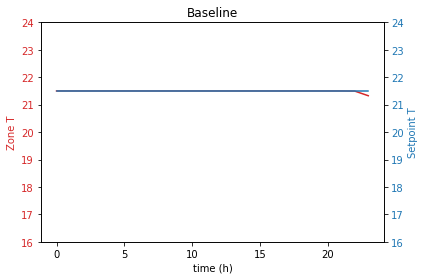

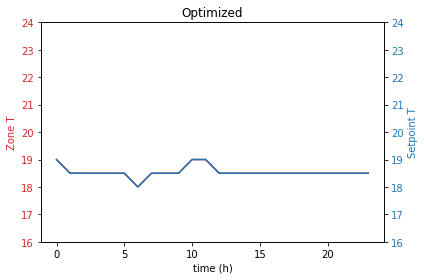

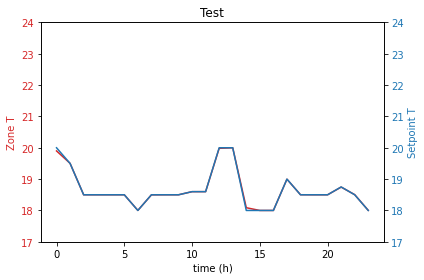

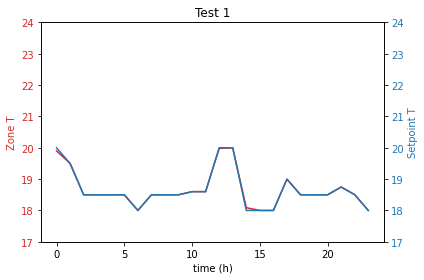

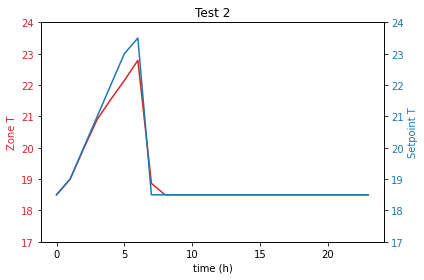

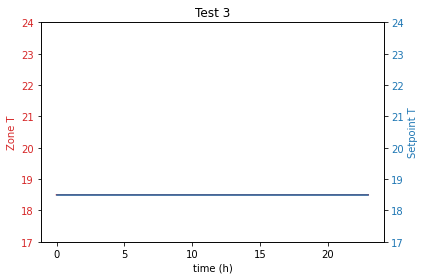

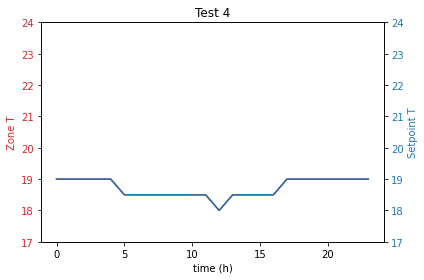

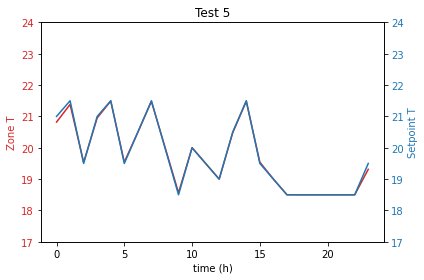

In [11]:
## BASELINE SETPOINT AND ACUTAL
t = np.arange(0, hours, 1)
data1 = ZoneT[0:hours]
data2 = Setpoint[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([16, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([16, 24])
plt.title('Baseline')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Optimized
t = np.arange(0, hours, 1)
data1 = ZoneT2[0:hours]
data2 = Setpoint2[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([16, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([16, 24])
plt.title('Optimized')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Test 1
t = np.arange(0, hours, 1)
data1 = ZoneTo1[0:hours]
data2 = Setpointo1[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])
plt.title('Test')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Test 1
t = np.arange(0, hours, 1)
data1 = ZoneTo1[0:hours]
data2 = Setpointo1[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])
plt.title('Test 1')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Test 1
t = np.arange(0, hours, 1)
data1 = ZoneTo2[0:hours]
data2 = Setpointo2[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])
plt.title('Test 2')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Test 1
t = np.arange(0, hours, 1)
data1 = ZoneTo3[0:hours]
data2 = Setpointo3[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])
plt.title('Test 3')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Test 1
t = np.arange(0, hours, 1)
data1 = ZoneTo4[0:hours]
data2 = Setpointo4[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])
plt.title('Test 4')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Test 1
t = np.arange(0, hours, 1)
data1 = ZoneTo5[0:hours]
data2 = Setpointo5[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])
plt.title('Test 5')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



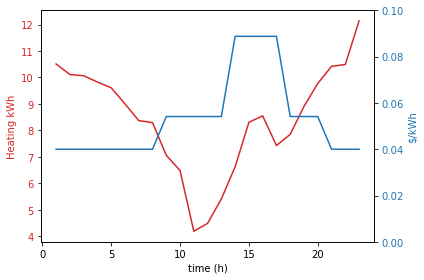

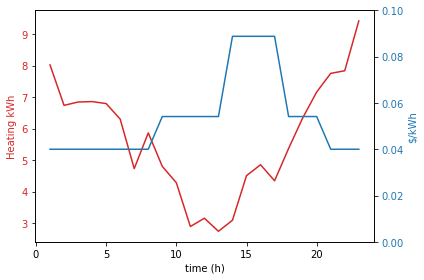

In [12]:
##HEATING ENERGY AND PRICE COMPARIOSN
t = np.arange(1, hours, 1)
data1 = Heating[0:hours-1]/3.6E6 ##J to kWh
heatingop = Heating2[0:hours-1]/3.6E6
data2 = PricePerKwh[0:hours-1]


fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature and Prices"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating kWh', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)

ax2.set_ylim([0, 0.1])
ax2.tick_params(axis='y', labelcolor=color)

ax2.plot(t,heatingop, color='pink')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#####Optimized
t = np.arange(1, hours, 1)
data1 = Heating2[0:hours-1]/3.6E6 ##J to kWh
data2 = PricePerKwh[0:hours-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature and Prices"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating kWh', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 0.1])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





In [13]:
##COMPARISON
print( 'BASELINE: ' + str(sum (Heating[0:hours]/1000000000)) + ' GJ')
print( 'BASELINE: $' + str(TotPrice))
#print( str(sum (Heating[0:hours]/3.6e6)) + 'kWh')
print( 'OPTIMIZE: ' + str(sum (Heating2[0:hours]/1000000000)) + ' GJ')
print( 'OPTIMIZED: $' + str(TotPrice2))

print( '1: ' + str(sum (Heatingo1[0:hours]/1000000000)) + ' GJ')
print( '1: $' + str(TotPriceo1))

print( '2: ' + str(sum (Heatingo2[0:hours]/1000000000)) + ' GJ')
print( '2: $' + str(TotPriceo2))

print( '3: ' + str(sum (Heatingo3[0:hours]/1000000000)) + ' GJ')
print( '3: $' + str(TotPriceo3))

print( '4: ' + str(sum (Heatingo4[0:hours]/1000000000)) + ' GJ')
print( '4: $' + str(TotPriceo4))

print( '5: ' + str(sum (Heatingo5[0:hours]/1000000000)) + ' GJ')
print( '5: $' + str(TotPriceo5))
#print( 'TEST: ' + str(sum (Heating3[0:hours]/1000000000)) + ' GJ')

BASELINE: 0.7440075913961336 GJ
BASELINE: $10.720988628034299
OPTIMIZE: 0.5082521044937834 GJ
OPTIMIZED: $7.165875179061977
1: 0.5167242902001017 GJ
1: $7.20239902154836
2: 0.5580948332324682 GJ
2: $7.537842197407031
3: 0.5053624567232206 GJ
3: $7.131922697114195
4: 0.5255829216772135 GJ
4: $7.393796716827785
5: 0.6018557299752182 GJ
5: $8.469103279650316


# RATING ANOTHER SCHEDULE

In [14]:
ChosenSchedule = input()

2


In [21]:
#Schedule Rating
Prices = [TotPriceo1,TotPriceo2,TotPriceo3,TotPriceo4,TotPriceo5]
ZoneTs = [ZoneTo1,ZoneTo2,ZoneTo3,ZoneTo4,ZoneTo5]
MaxP = TotPrice
MinP = TotPrice2
DayPrice = Prices[int(ChosenSchedule)-1]

PriceRating = (1-(DayPrice-MinP)/(MaxP-MinP))*5
if (PriceRating > 5):
    PriceRating=5
    
print(PriceRating)

##Comfort Rating
## Preffered point not met while occupied 
PrefT = 20
count =0

for i in range (23):
    T = ZoneTs[int(ChosenSchedule)-1]['LIVING ZONE:Zone Mean Air Temperature [C](Hourly)'][i]
    if (i <7 or i>17):
        if (abs(T-PrefT)> 1.25):
            count = count+1
print(count)  

TRating = (1-(count/24))*5
if (TRating > 5):
    TRating=5
    
print("RATING:" + str(TRating))

4.4768563314729395
9
RATING:3.125


In [22]:
Rating = 0.5*PriceRating + 0.5*TRating
print('RATING:' +str(Rating))

RATING:3.8009281657364697
